# Index Trendosaurus: Can Indexes Be Predicted By Their Stocks Using ML?

## by Frederick Park

### last updated 18 May 2025

# Introduction

This project, Index Trendosaurus, will attempt to predict the fluctuation of the S&P 500 over time by understanding patterns in specific stocks that it tracks. Index Trendosaurus will also see if there are any overall trends in the S&P 500. I will compare this data to actual values to see how accurate this model is. I then want to classify various stocks into different categories based on their fluctuation history. 

This project will utilize various machine learning techniques and models, as you will see below. By visualizing data, predicting trends, applying models, and extrapolating and interpolating data points, we can hopefully develop an absolute dinosaur of a model to predict stock fluctuations and see if the market is as random as it seems.


# Sources

I acquired the CSV dataset under the CC 4.0 free and public use license hosted by Kaggle.com and its publishers. 

The dataset can be found below.

https://www.kaggle.com/datasets/atacs26/s-and-p-500-popular-stocks-daily-trends-and-change

This dataset utilizes data collected from US Stock Market Data, particularly relating to the S&P 500 index.


In [164]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Data Preprocessing

Before anything, we must first get our datasets and look at only the relevant information:


In [28]:
#Reading our S&P file and putting it in a pandas dataframe
sp_df = pd.read_csv("sp500_trends.csv")
print(sp_df.head())

   Unnamed: 0        Date  sp500_increase  sp500_changep  ADBE_increase  \
0           0  2021-04-19               0      -0.252251              0   
1           1  2021-04-16               1       0.002399              1   
2           2  2021-04-15               1       0.514817              1   
3           3  2021-04-14               0      -0.334272              0   
4           4  2021-04-13               1       0.323181              1   

   ADBE_changep  INTC_increase  INTC_changep  MSFT_increase  MSFT_changep  \
0     -1.330457              0     -1.653780              0     -0.557290   
1      0.165963              0     -0.887803              1      0.489455   
2      1.469936              1      1.641387              1      0.608695   
3     -0.655641              0     -1.714891              0     -0.734043   
4      1.580345              0     -0.594421              1      0.478108   

   ...  DIS_increase  DIS_changep  NFLX_increase  NFLX_changep  TSLA_increase  \
0  ..

In [179]:
#Seeing better what specific data is in our dataframe
print(sp_df.columns)

Index(['Unnamed: 0', 'Date', 'sp500_increase', 'sp500_changep',
       'ADBE_increase', 'ADBE_changep', 'INTC_increase', 'INTC_changep',
       'MSFT_increase', 'MSFT_changep', 'AMD_increase', 'AMD_changep',
       'NVDA_increase', 'NVDA_changep', 'DIS_increase', 'DIS_changep',
       'NFLX_increase', 'NFLX_changep', 'TSLA_increase', 'TSLA_changep',
       'META_increase', 'META_changep', 'KFC_increase', 'KFC_changep', 'Year',
       'Month', 'Day'],
      dtype='object')


Having our dates as strings in our dataframe is rather annoying when we try to create visualizations and make models, so let's split our date into year, month, and day columns then also create another date column that is made of ints. Also it is nice to keep the date information as the first three columns, so we move them to the front.

In [37]:
#Splitting up the "Date" column in our original S&P 500 dataframe
sp_df['Date'] = pd.to_datetime(sp_df['Date'])
sp_df['Year'] = sp_df['Date'].dt.year
sp_df['Month'] = sp_df['Date'].dt.month
sp_df['Day'] = sp_df['Date'].dt.day
new_sp_df = sp_df.drop(columns = ["Date"])
cols = ["Unnamed: 0",'Year', 'Month', 'Day'] + [col for col in sp_df.columns if col not in ["Unnamed: 0",'Year', 'Month', 'Day']]
new_sp_df = sp_df[cols]
new_sp_df['Date'] = pd.to_datetime(new_sp_df[['Year', 'Month', 'Day']])
new_sp_df                              

,Unnamed: 0,Year,Month,Day,Date,sp500_increase,sp500_changep,ADBE_increase,ADBE_changep,INTC_increase,...,DIS_increase,DIS_changep,NFLX_increase,NFLX_changep,TSLA_increase,TSLA_changep,META_increase,META_changep,KFC_increase,KFC_changep
0,0,2021,4,19,2021-04-19,0,-0.252251,0,-1.330457,0,...,0,-0.042665,1,1.378676,0,-0.690660,0,-0.908173,1,0.096339
1,1,2021,4,16,2021-04-16,1,0.002399,1,0.165963,0,...,0,-0.165278,0,-0.726559,1,1.527485,0,-0.645754,1,0.241546
2,2,2021,4,15,2021-04-15,1,0.514817,1,1.469936,1,...,0,-1.148388,1,0.928017,0,-0.571924,1,0.483127,1,0.096712
3,3,2021,4,14,2021-04-14,0,-0.334272,0,-0.655641,0,...,1,0.801207,0,-2.676298,0,-4.991566,0,-1.457853,1,0.241663
4,4,2021,4,13,2021-04-13,1,0.323181,1,1.580345,0,...,0,-0.053877,0,-0.587077,1,6.962260,0,-0.784722,1,0.828057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2123,2012,5,24,2012-05-24,0,-0.075402,0,-1.958338,1,...,1,0.067550,0,-1.747768,0,-3.103970,1,0.242786,-1,0.000000
2124,2124,2012,5,23,2012-05-23,1,0.777146,1,1.514194,0,...,0,-0.067818,1,6.580706,1,1.505255,1,2.008285,-1,0.000000
2125,2125,2012,5,22,2012-05-22,0,-0.083139,1,0.125114,0,...,0,-0.224775,0,-5.696382,1,2.325555,0,-4.937139,-1,0.000000
2126,2126,2012,5,21,2012-05-21,1,1.390594,1,1.780596,1,...,1,1.323894,1,2.705798,1,4.314699,0,-6.843690,-1,0.000000


# Data Visualization

We can now create visualizations to better understand relationships in our data:


First let's look at the correlations of all our features in the original S&P 500 dataframe.

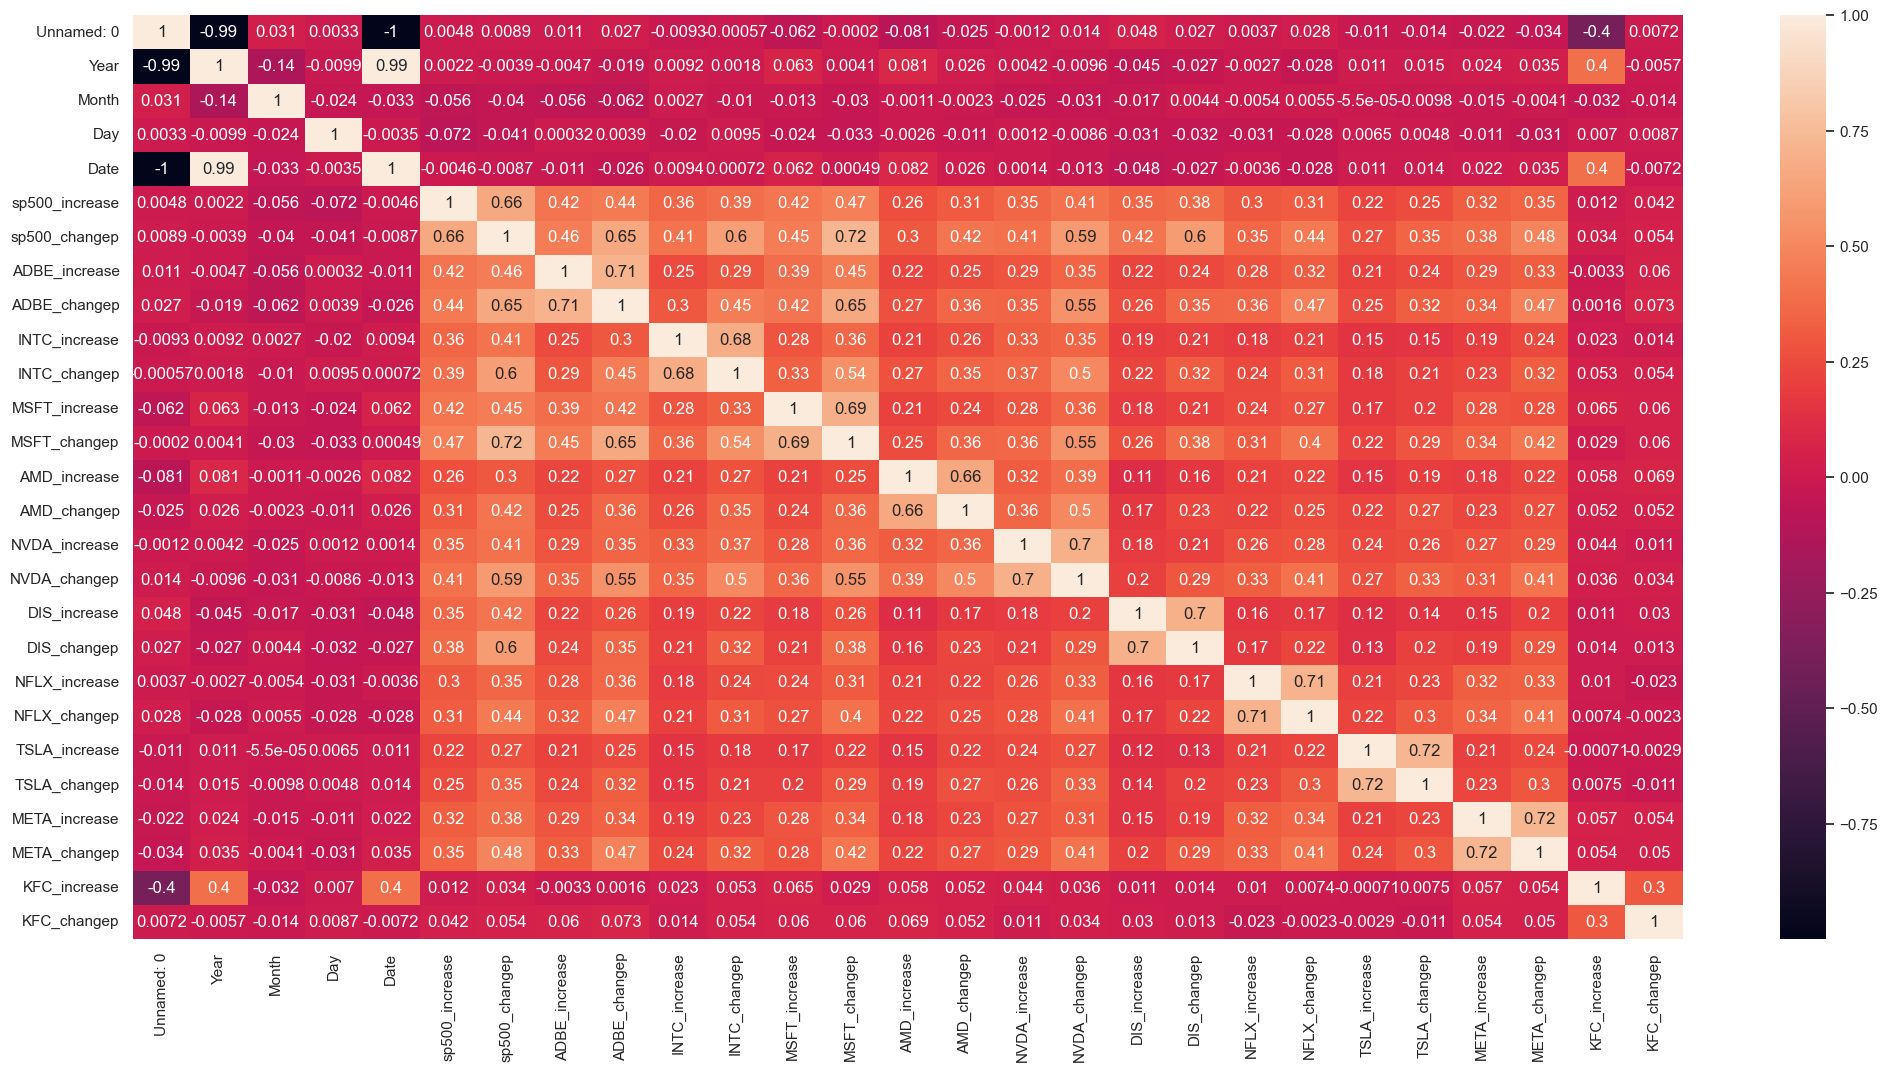

In [181]:
#Creating our heatmap
corr = new_sp_df.corr()
sns.set(rc = {'figure.figsize':(25,12)})
sns.heatmap(corr, annot=True)
plt.show()

This heatmap shows the correlation between each variable. Each variable is included on both the x and y axes. The color depicts how strongly correlated the variables are. Light boxes show the variables are very strongly correlated, dark boxes show the variables are very negatively correlated, and purple/reddish boxes show the variables are rather uncorrelated. As seen, the variables most correlated with an increase in the sp500_changep variable are the MSFT_changep, sp500_increase, and ADBE_changep variables.

Now let's get a gauge for which stocks tended to increase most often compared to the other stocks. We can do this by creating a bar graph that counts the _increase columns.

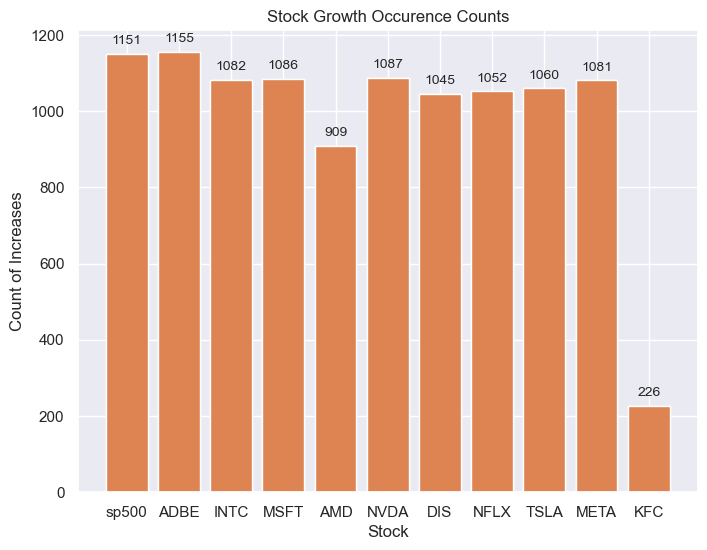

In [47]:
#Creating our bar graph
increase_cols = [col for col in new_sp_df.columns if col.endswith('_increase')]
increase_counts = new_sp_df[increase_cols].sum()
increase_cols = [col.replace('_increase', '') for col in increase_cols]
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(increase_cols, increase_counts)
ax.bar_label(bars, fontsize=10, padding=5)
plt.bar(increase_cols, increase_counts,align='center')
plt.title('Stock Growth Occurence Counts')
plt.ylabel('Count of Increases')
plt.xlabel('Stock')
plt.show()

As seen in this bar graph, the ADBE stock increased the most number of days in our timeframe, but most stocks (including the S&P 500 index) were very close to the same number of increase days. There is a very noticeable exception from this trend for the KFC stock.

# Classifying the Market

We have observed how different stocks relate to each other, but a common question that someone interested in the market might ask is what direction the market will go in the next day. This is a very general question, but we can do this by analzing the other stocks and see how they together affect the trend of S&P500, which is an aggregate of the market. We will attempt to classify using a decision tree.

In [106]:
# Get the changes for each stock and drop the first row since we don't want to include the "next day"
increase_cols2 = [col for col in new_sp_df.columns if col.endswith('_changep') and col != 'sp500_changep']
sp500 = new_sp_df['sp500_increase'].shift(-1)  
sp500 = sp500.dropna() 

# Define X and Y
X = new_sp_df[increase_cols2].iloc[:-1]
Y = sp500

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train decision tree
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.5704225352112676


We can also make a quick plot of the decision tree's accuracy over various max depths:

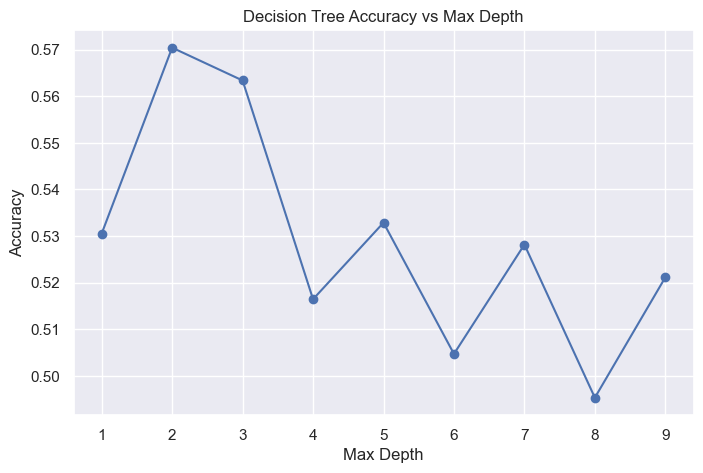

In [110]:
depths = range(1, 10)
accuracies = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, Y_train)
    preds = tree.predict(X_test)
    acc = accuracy_score(Y_test, preds)
    accuracies.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.grid(True)
plt.show()

Wow, that's pretty interesting. Our other stocks can predict the general movement of the overall market given by S&P500, but the accuracy is only barely above 50%, with the highest only around 57%.

Also, we optimized our accuracy by analyzing the accuracy over various max depths before arriving at an optimal max depth of 2. Notice that we went up to a max depth of around 9 but avoided going any higher to avoid over-fitting.

# Predicting the Movement of Stocks

We've seen if we can classify using decision trees whether or not the general market can increase or decrease given the movement of other stocks, but can we now predict the exact movement of certain stocks?


To do this, we are going to regress over the trends of our 10 stocks, and then test it against the changes in S&P500 using Linear Regression!!

In [183]:
# Get the changes for each stock and drop the first row since we don't want to include the "next day"
increase_cols3 = increase_cols2
sp500_change = new_sp_df['sp500_changep'].shift(-1)  
sp500_change = sp500_change.dropna() 

# Define X and Y
X = new_sp_df[increase_cols3].iloc[:-1]
Y = sp500_change

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create model and train
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = linreg.predict(X_test)
print("Linear Regression Root Mean Squared Error:", root_mean_squared_error(Y_test, Y_pred))

Linear Regression Root Mean Squared Error: 0.6982695343057659



That's not a crazy bad error. Let's see if using a different model we can get a better error. Let's now regress using Random Forest Regressor:

In [168]:
# Get the changes for each stock and drop the first row since we don't want to include the "next day"
increase_cols3 = increase_cols2
sp500_change = new_sp_df['sp500_changep'].shift(-1)  
sp500_change = sp500_change.dropna() 

# Define X and Y
X = new_sp_df[increase_cols3].iloc[:-1]
Y = sp500_change

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create model and train
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = rf.predict(X_test)
print("Random Forest Root Mean Squared Error:", root_mean_squared_error(Y_test, Y_pred))

Random Forest Root Mean Squared Error: 0.6938544709595316


We can also plot the accuracy score of our Random Forest over many trees:

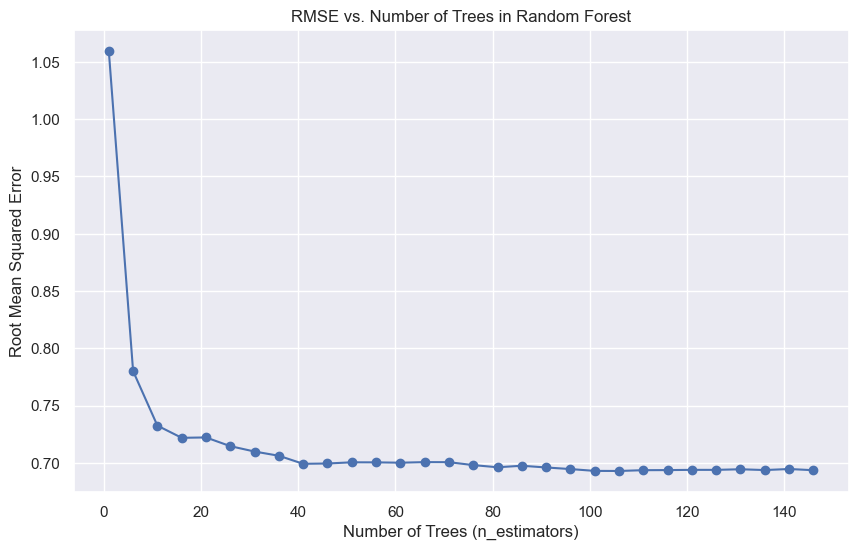

In [174]:
tree_range = range(1, 151, 5)
rmses = []

for n in tree_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    rmse = root_mean_squared_error(Y_test, Y_pred)
    rmses.append(rmse)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tree_range, rmses, marker='o')
plt.title('RMSE vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

# Conclusion

Overall, this project shows that while both models are not great, a Random Forest Regressor is slightly better at predicting the change of the market, S&P 500, using data from 10 large (and not as large) stocks. By quickly analyzing our data, daily changes vary from about -10 to +10, so an RMSE of 0.69 is good but not great.

I was also able to classify our daily changes of S&P into increasing or decreasing based on the trends of the market. However, our best accuracy score using Decision Trees was only about 57%, which is barely better than a coin flip. However, it is important to note that we were classifying the movement of the S&P 500 with only 10 stocks when it tracks 500. Additionally, it is challenging to accurately model financial data (people create entire livelihoods on this sort of thing).

However, we also want to take a step back and look at the macro scale of what is happening. Over time, we expect the trend of the market to increase, and by looking at the bar graph above and analyzing the data set, most of the large stocks increased slightly more than they increased. Also, we have to understand that there is a lot of uncertainty in the market, and if there were a sound way to predict the exact changes in the market, that would remove the essence of variation from the market. However, the general trend of the market will slightly increase over time, which it does in our case.